<a href="https://colab.research.google.com/github/dornercr/DSCI631/blob/main/DSCI631_Week1_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI631
**Week 1 Lecture**  
**Prof. Charles Dorner, EdD Candidate**


# Setup

In [ ]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

We will use California Housing data as example. It contains data drawn from the 1990 U.S. Census: realted literature:
*Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.*
>We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About This File

This dataset contains information on housing data from California, often used for practicing data analysis and machine learning.  
Each row represents a block group (a small geographic unit), and the columns provide demographic, geographic, and housing-related attributes.  

## Variables

1. **longitude**  
   A measure of how far west a house is; a higher value means farther west.

2. **latitude**  
   A measure of how far north a house is; a higher value means farther north.

3. **housingMedianAge**  
   Median age of a house within a block; a lower number indicates a newer building.

4. **totalRooms**  
   Total number of rooms within a block.

5. **totalBedrooms**  
   Total number of bedrooms within a block.

6. **population**  
   Total number of people residing within a block.

7. **households**  
   Total number of households (a group of people residing within a home unit) for a block.

8. **medianIncome**  
   Median income for households within a block of houses (measured in tens of thousands of US Dollars).

9. **medianHouseValue**  
   Median house value for households within a block (measured in US Dollars).

10. **oceanProximity**  
    Location of the house relative to the ocean/sea.


In [ ]:
# Known good URL for the California housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

# Read the CSV file directly into a DataFrame
housing = pd.read_csv(url)

# Show the first few rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Column `total_bedrooms` seem to have about 200 missing values; `ocean_proximity` is not numerical data.

In [ ]:
# take a look how many districts belong to each category
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


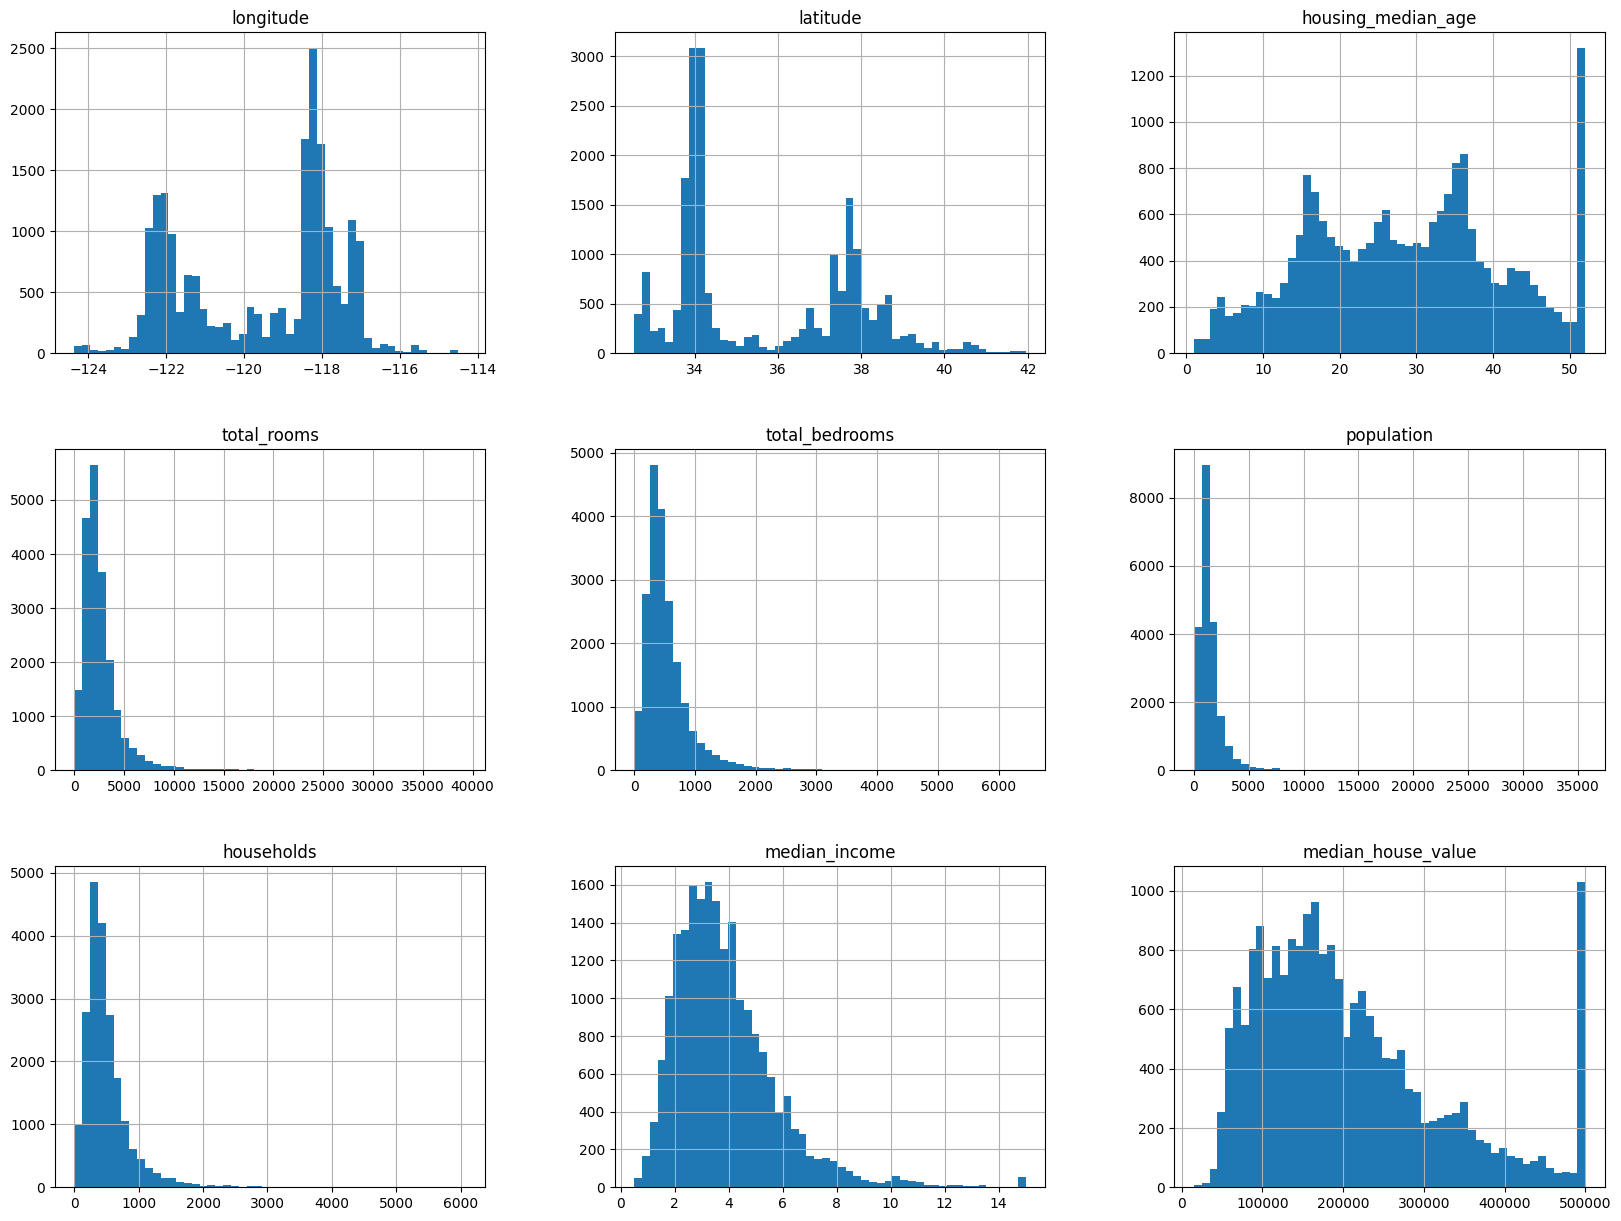

In [ ]:
# plot a histogram for each numerical attribute to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Observation:

- These attributes have very different scales.
- The `housing_median_age` and the `median_house_value` were capped. The `median_house_value` may be a serious problem since it is the label to predict. The Machine Learning algorithms may learn that prices never go beyond that limit. You need to check to see if this is a problem or not. If precise predictions even beyond 500,000 is needed, then you have two options:
    * Option 1: Collect proper labels for the districts whose labels were capped.
    * Option 2: Remove those districts from the dataset.
    
- Many attributes are right skewed. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes to have more bell-shaped distributions.

### Split the data
Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is `train_test_split()`, which provides a couple of additional features.
- First, there is a random_state parameter that allows you to set the random generator seed.
- Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


So far we have considered purely random sampling methods. This is generally fine if the dataset is large enough (especially relative to the number of attributes), but if it is not, will face the risk of introducing a significant sampling bias.

When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population.

For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called **stratified sampling**: the population is divided into homogeneous subgroups called **strata**, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

Suppose `median_income` is a very important attribute to predict median housing prices. We want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

Since the `median_income` is a continuous numerical attribute, we first need to create an income category attribute. It is important to have a sufficient number of instances in for each stratum, or else the estimate of a stratum’s importance may be biased. This means that we should not have too many strata, and each stratum should be large enough.

<Axes: >

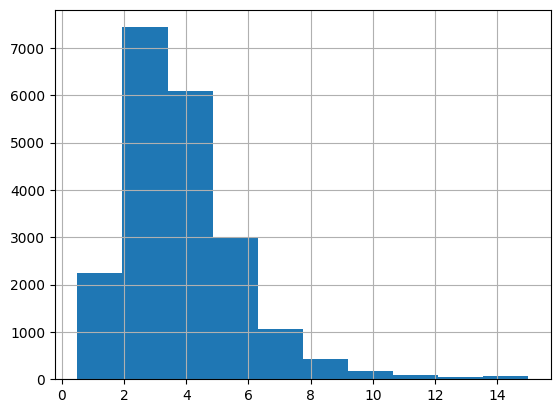

In [ ]:
housing["median_income"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


<Axes: >

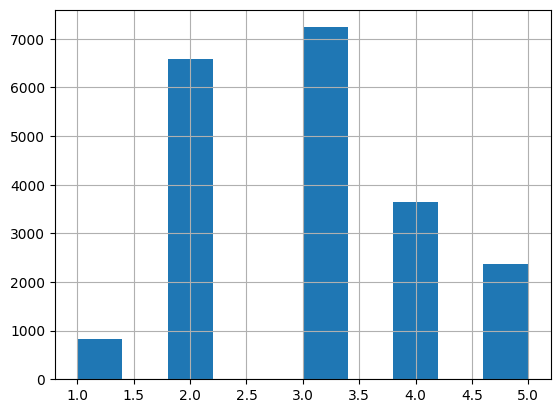

In [ ]:
housing["income_cat"].hist()

The `stratify` within `train_test_split` offers an option for stratified sampling.

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42,
                                         stratify = housing["income_cat"])

We can also use Scikit-Learn’s `StratifiedShuffleSplit` to realize stratified sampling.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set1 = housing.loc[train_index]
    strat_test_set1 = housing.loc[test_index]

we can take a look at the comparison of stratified sampling and random sampling.

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set), # train_test_split
    "Stratified1": income_cat_proportions(strat_test_set1), # StratifiedShuffleSplit
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Stratified1,Random,Rand. %error,Strat. %error
income_cat,,,,,,
1,0.039826,0.039971,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
# remove the income_cat attribute so the data is back to its original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Gain insights

In [ ]:
housing = strat_train_set.copy()

/tmp/ipython-input-1577504126.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


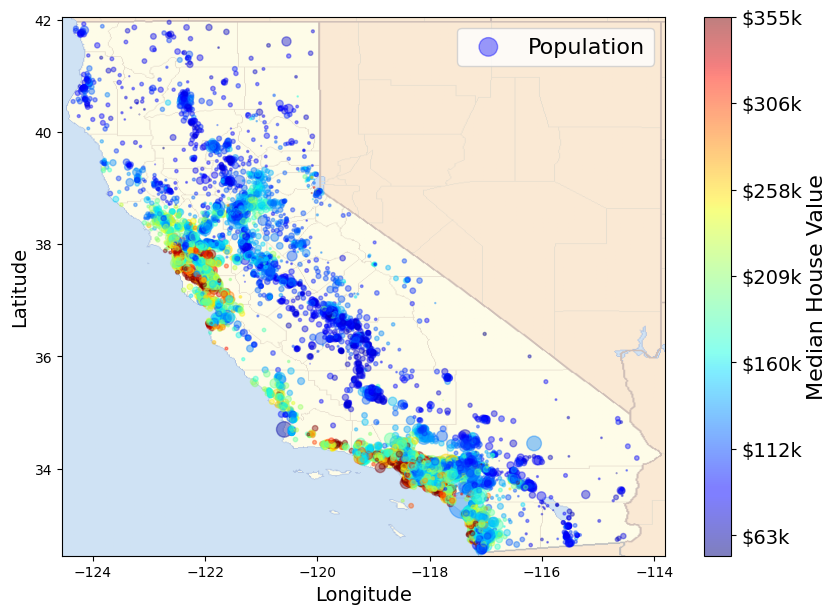

In [ ]:
california_img=mpimg.imread("california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Looking for correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method.

In [ ]:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


The correlation coefficient ranges from –1 to 1.
- When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.
- When the coefficient is close to –1, it means that there is a strong negative correlation; we can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when head to north of California).
- Finally, coefficients close to 0 mean that there is no linear correlation.

<img src="https://i.ytimg.com/vi/IwNZAnRLSyE/maxresdefault.jpg" width="600">

Another way to check for correlation between attributes is to use the pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute.

We will just focus on a few promising attributes that seem most correlated with the `median_housing_value`.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

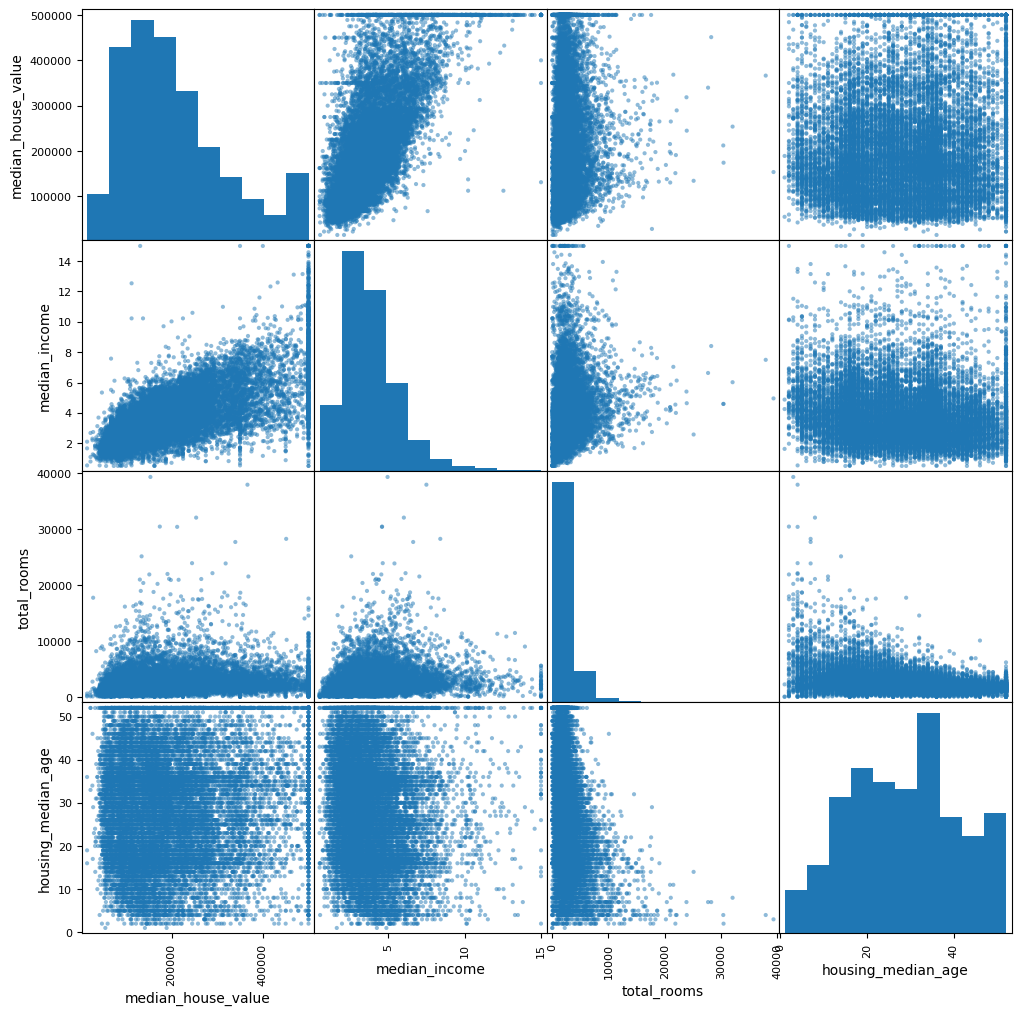

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12))

The most promising attribute to predict the `median_house` value is the median income.

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

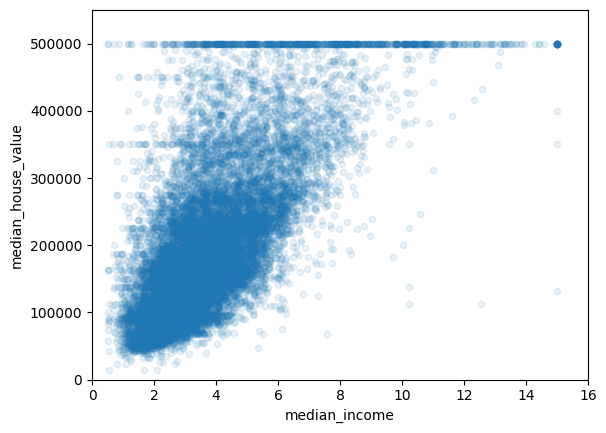

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

This plot reveals a few things.
- First, the correlation is indeed very strong: upward trend can be clearly seen, and the points are not too dispersed.
- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that.

We may want to try removing the corresponding districts to prevent algorithms from learning to reproduce these data quirks.

### Attribute Combinations

One more thing you to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations.

- For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household.
- Similarly, the total number of bedrooms by itself is not very useful: we probably want to compare it to the number of rooms.
- The population per household also seems like an interesting attribute combination to look at.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# let’s look at the correlation matrix again
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


The new `bedrooms_per_room` attribute is much more correlated with the median house value than the `total_rooms` or `total_bedrooms`. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The `rooms_per_household` is also more informative than `total_rooms` in a district—obviously the larger the houses, the more expensive they are.

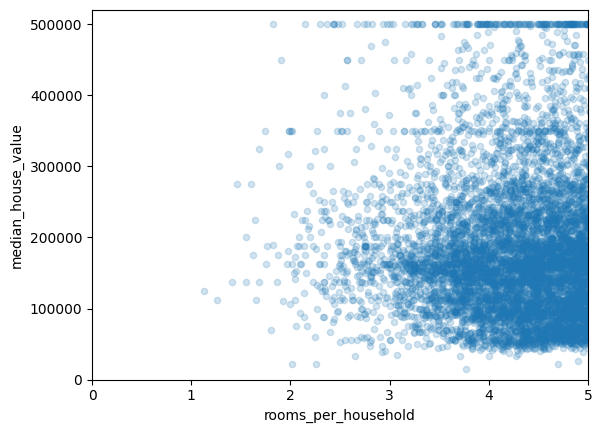

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Data preparation for Machine Learning algorithms

It’s time to prepare the data for Machine Learning algorithms. Instead of doing this manually, we should write functions for this purpose, for several good reasons:

- This will allow reproduce these transformations easily on any dataset (e.g., the next time get a fresh dataset).
- We can gradually build a library of transformation functions that you can reuse in future projects.
- We can use these functions in your live system to transform the new data before feeding it to ML algorithms.

In [ ]:
# revert to a clean training set
# separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. We saw earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this with three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

We can accomplish these easily using DataFrame’s `dropna()`, `drop()`, and `fillna()`.

In [ ]:
def option_for_NA(df, col_name = "total_bedrooms", option=3):
    if option == 1:
        return df.dropna(subset=[col_name])
    elif option == 2:
        return df.drop(col_name, axis=1)
    elif option == 3:
        median = housing[col_name].median()
        df[col_name].fillna(median, inplace=True)
        return df

If choose option 3, DO NOT forget to save the median value computed. We will need it later to replace missing values in the test set when evaluate the system, and also once the system goes live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Remove the text attribute because median can only be calculated on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

# fit the imputer instance to the training data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. It is usually safer to apply the imputer to all the numerical attributes.

In [ ]:
# Check this is the same as manually computing the median of each attribute
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

Transform the training set with imputer.

In [ ]:
imputer.strategy

'median'

In [ ]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Categorical attributes

So far we have only dealt with numerical attributes. Now let's preprocess the categorical input feature, `ocean_proximity`.

Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s `OrdinalEncoder` class.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.]])

We can get the list of categories using the `categories_` instance variable. It is a list containing a 1D array of categories for each categorical attribute.

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

What is the problem here??

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the `ocean_proximity` column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category. The new attributes are sometimes called *dummy attributes*. Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

# alternatively, set sparse=False
# cat_encoder = OneHotEncoder(sparse=False)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformer

Although Scikit-Learn provides many useful transformers, we will need to write our own for tasks such as custom cleanup operations or combining specific attributes. We will want our transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all we need to do is create a class and implement three methods: `fit()` (returning self), `transform()`, and `fit_transform()`.

We can get the last one for free by simply adding `TransformerMixin` as a base class. If add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in the constructor), we will also get two extra methods (`get_params()` and `set_params()`) that will be useful for automatic hyperparameter tuning.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In above example the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default. This hyperparameter will allow us to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that you are not 100% sure about.

### Feature Scaling

One of the most important transformations you need to apply to your data is **feature scaling**. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. *Note that scaling the target values is generally not required*.

There are two common ways to get all attributes to have the same scale: **min-max scaling** and **standardization**.
- Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the minimum value and dividing by (maximum - minimum). Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that allow to  change the range.
- Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called `StandardScaler` for standardization.
- other scalling:
    * `MaxAbsScaler`: differs from the previous scaler such that the absolute values are mapped in the range [0, 1]. On positive only data, this scaler behaves similarly to MinMaxScaler and therefore also suffers from the presence of large outliers.
    * `RobustScaler`: uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. After Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.
    * `Normalizer`: points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

Scikit-Learn introduced the `ColumnTransformer` for this purpose.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 16)

Note that the `OneHotEncoder` returns a sparse matrix, while the `num_pipeline` returns a dense matrix. When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3).

# Select and train a model

We are now ready to select and train a Machine Learning model!

### Linear Regression

Let's first try on Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Compare against the actual values:

A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i = 1}^m(h(x^{(i)})-y^{(i)})^2}$$

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier districts. In that case, you may consider using the mean absolute error (MAE).

$$MAE(X,h)=\frac{1}{m}\sum_{i=1}^m|h(x^{(i)})-y^{(i)}|$$

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. RMSE corresponds to the Euclidean distance, MAE corresponds to the Manhattan distance.

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

### Decision Tree
A prediction error of 68,628 of `median_housing_values` which range between 120,000 and 265,000 is not very satisfying. Let's try a more powerful model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

No error at all? Could this model really be absolutely perfect?